In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityride_df = pd.merge(city_df, ride_df, on='city')

# Display the data table for preview
cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

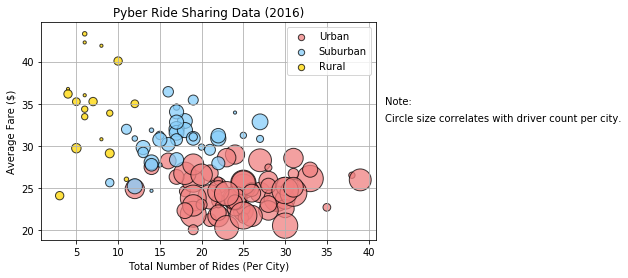

In [2]:
# Obtain the x and y coordinates for each of the three city types

# RURAL

# get the average fare per rural city
rural_city_gb = cityride_df[cityride_df.type == 'Rural'].groupby(["city"])
rural_city_avg_fare = rural_city_gb.fare.mean().round(2)

# make into a df
rural_city_avg_fare_df = pd.DataFrame(rural_city_avg_fare)

# get # of rides per rural city
rural_city_rides = rural_city_gb.ride_id.count()

# make into a df
rural_city_rides_df = pd.DataFrame(rural_city_rides)

# get the number of drivers per rural city
rural_driver_count_cnt = rural_city_gb.driver_count.value_counts()

# make into a df
rural_driver_count_df = pd.DataFrame(rural_driver_count_cnt)

# delete duplicated column
del rural_driver_count_df['driver_count']

# reset the index
rural_driver_count_reset = rural_driver_count_df.reset_index()

# set the index to city
rural_driver_count_set = rural_driver_count_reset.set_index('city')

# SUBURBAN

# get the average fare per suburban city
sub_city_gb = cityride_df[cityride_df.type == 'Suburban'].groupby(["city"])
sub_city_avg_fare = sub_city_gb.fare.mean().round(2)

# make into a df
sub_city_avg_fare_df = pd.DataFrame(sub_city_avg_fare)

# get # of rides per suburban city
sub_city_rides = sub_city_gb.ride_id.count()

# make into a df
sub_city_rides_df = pd.DataFrame(sub_city_rides)

# get the number of drivers per suburban city
sub_driver_count_cnt = sub_city_gb.driver_count.value_counts()

# make into a df
sub_driver_count_df = pd.DataFrame(sub_driver_count_cnt)

# delete duplicated column
del sub_driver_count_df['driver_count']

# reset the index
sub_driver_count_reset = sub_driver_count_df.reset_index()

# set the index to city
sub_driver_count_set = sub_driver_count_reset.set_index('city')

# URBAN

# get the average fare per urban city
urb_city_gb = cityride_df[cityride_df.type == 'Urban'].groupby(["city"])
urb_city_avg_fare = urb_city_gb.fare.mean().round(2)

# make into a df
urb_city_avg_fare_df = pd.DataFrame(urb_city_avg_fare)

# get # of rides per urban city
urb_city_rides = urb_city_gb.ride_id.count()

# make into a df
urb_city_rides_df = pd.DataFrame(urb_city_rides)

# get the number of drivers per urban city
urb_driver_count_cnt = urb_city_gb.driver_count.value_counts()

# make into a df
urb_driver_count_df = pd.DataFrame(urb_driver_count_cnt)

# delete duplicated column
del urb_driver_count_df['driver_count']

# reset the index
urb_driver_count_reset = urb_driver_count_df.reset_index()

# set the index to city
urb_driver_count_set = urb_driver_count_reset.set_index('city')


# Build the scatter plots for each city types

#RURAL
x_axis_rural = rural_city_rides_df['ride_id']
y_axis_rural = rural_city_avg_fare_df['fare']
z_axis_rural = rural_driver_count_set['driver_count']

#SUBURBAN
x_axis_sub = sub_city_rides_df['ride_id']
y_axis_sub = sub_city_avg_fare_df['fare']
z_axis_sub = sub_driver_count_set['driver_count']


# URBAN
x_axis_urb = urb_city_rides_df['ride_id']
y_axis_urb = urb_city_avg_fare_df['fare']
z_axis_urb = urb_driver_count_set['driver_count']

# plot urban
plt.scatter(x_axis_urb, y_axis_urb, s=z_axis_urb*10, alpha=.75, color="LightCoral", edgecolors="black", label="Urban")

# plot suburban
plt.scatter(x_axis_sub, y_axis_sub, s=z_axis_sub*10, alpha=.75, color="LightSkyBlue",edgecolors="black", label="Suburban")

# plot rural
plt.scatter(x_axis_rural, y_axis_rural, s=z_axis_rural*10, alpha=.75, color="Gold",edgecolors="black", label="Rural")


# Incorporate the other graph properties

# add a grid
plt.grid(True)

# add an x label, y label, and title
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')


# Create a legend

# tell plt to put the legend in the best place
lgnd = plt.legend(loc="best")

# fix the sizing of the legend markers
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]


# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:', fontsize=10)
plt.text(42, 33, 'Circle size correlates with driver count per city.', fontsize=10)


# Save Figure
plt.savefig("PyberRideShareData.png")


# Show plot
plt.show()

OBSERVABLE TRENDS (1 & 2):

The urban areas make up the greatest percent of total fares, rides, and drivers.

The average fare prices per city are higher in suburban areas and even higher, in general, in the rural areas.

## Total Fares by City Type

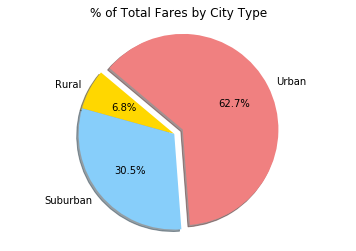

In [3]:
# Calculate Type Percents

# get the total fares
total_fare = cityride_df.fare.sum().round(1)

#get the sum of fares by type of area
sumfare_gb = cityride_df.groupby('type')
sumfare = sumfare_gb.fare.sum().round(1)

# calculate the rural fare percent
rural_fare_percent = (sumfare[0] / total_fare * 100).round(1)

# calculate the suburban fare percent
sub_fare_percent = (sumfare[1] / total_fare * 100).round(1)

# calculate the urban fare percent
urb_fare_percent = (sumfare[2] / total_fare * 100).round(1)


# Build Pie Chart

# set the labels
labels = ["Rural", "Suburban", "Urban"]

# set the values
sizes = [rural_fare_percent, sub_fare_percent, urb_fare_percent]

# set the colors
colors = ["Gold", "LightSkyBlue", "LightCoral"]

# seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# give it a title
plt.title('% of Total Fares by City Type')

# equalize axes
plt.axis("equal")


# Save Figure
plt.savefig("PyberFaresByCity.png")


# Show Figure
plt.show()

## Total Rides by City Type

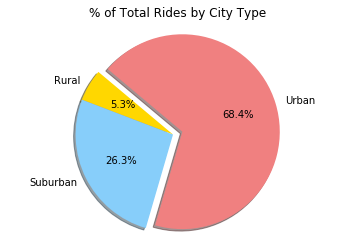

In [4]:
# Calculate Ride Percents

# get the total rides
total_ride = cityride_df.ride_id.count()

# get the total rides by type
totride_gb = cityride_df.groupby('type')
totride = totride_gb.ride_id.count()

# get the rural ride percent
rural_ride = (totride[0] / total_ride * 100).round(1)

# get the suburban ride percent
sub_ride = (totride[1] / total_ride * 100).round(1)

# get the urban ride percent
urb_ride = (totride[2] / total_ride * 100).round(1)


# Build Pie Chart

# set the labels
labels = ["Rural", "Suburban", "Urban"]

# set the values
sizes = [rural_ride, sub_ride, urb_ride]

# set the colors
colors = ["Gold", "LightSkyBlue", "LightCoral"]

# seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# give it a title
plt.title('% of Total Rides by City Type')

# equalize axes
plt.axis("equal")


# Save Figure
plt.savefig("PyberRidesByCity.png")


# Show Figure
plt.show()

## Total Drivers by City Type

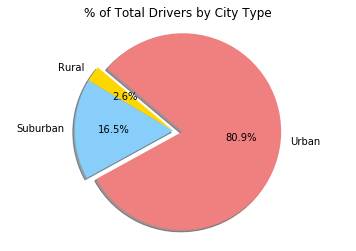

In [5]:
# Calculate Driver Percents

# get total rural drivers
total_rural_drivers = rural_driver_count_set.driver_count.sum()

# get total suburban drivers
total_sub_drivers = sub_driver_count_set.driver_count.sum()

# get total urban drivers
total_urban_drivers = urb_driver_count_set.driver_count.sum()

# get total drivers
total_drivers = total_rural_drivers + total_sub_drivers + total_urban_drivers

# ger rural drivers percent
rural_drivers = (total_rural_drivers / total_drivers * 100).round(1)

# get suburban drivers percent
sub_drivers = (total_sub_drivers / total_drivers * 100).round(1)

# get urban drivers percent
urb_drivers = (total_urban_drivers / total_drivers * 100).round(1)


# Build Pie Charts

# set the labels
labels = ["Rural", "Suburban", "Urban"]

# set the values
sizes = [rural_drivers, sub_drivers, urb_drivers]

# set the colors
colors = ["Gold", "LightSkyBlue", "LightCoral"]

# seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# give it a title
plt.title('% of Total Drivers by City Type')

# equalize axes
plt.axis("equal")


# Save Figure
plt.savefig("PyberDriversByCity.png")


# Show Figure
plt.show()

OBSERVABLE TREND (3):

Although the suburban areas only account for 16.5% of the total drivers, the suburban areas makes up almost a third of the total fares and a 26.3% of the total rides.